# 1. Loading & Preprocessing Data:
• Load a CSV file and check for missing values.

• Replace categorical values with numerical encoding techniques.

In [ ]:
# Load CSV file
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('e-commerce.csv',encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Check for missing values
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# Replace categorical values with numerical encoding techniques.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Country'] = encoder.fit_transform(df['Country'])

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,36
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,36
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,36
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,36
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,36
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,13
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,13
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,13
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,13


# 2. Data Analysis & Groupby:
• Using pandas, analyze a dataset to find the total number of unique values in a specific categorical column.

• Use groupby() to analyze customer spending trends in an e-commerce dataset.

In [ ]:
# Using pandas, analyze a dataset to find the total number of unique values in a specific categorical column.

unique_count = df['Country'].unique()

In [ ]:
df['Country'].unique()

array([36, 13,  0, 24, 14, 25, 10, 33, 31, 26, 27, 19,  3, 22, 20, 17,  6,
        9,  7, 32,  1, 18, 12,  2, 15, 16, 30, 21, 35, 29,  8,  5, 37,  4,
       34, 11, 23, 28])

In [ ]:
# Use groupby() to analyze customer spending trends in an e-commerce dataset.

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum().reset_index()
customer_spending = customer_spending.sort_values(by='TotalPrice', ascending=False)
customer_spending

,CustomerID,TotalPrice
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45
...,...,...
125,12503.0,-1126.00
3870,17603.0,-1165.30
1384,14213.0,-1192.20
2236,15369.0,-1592.49


# 3.Visualization:
• Create a scatter plot to analyze the relationship between two numerical columns in a dataset.

• Use box plots to identify outliers in a dataset.

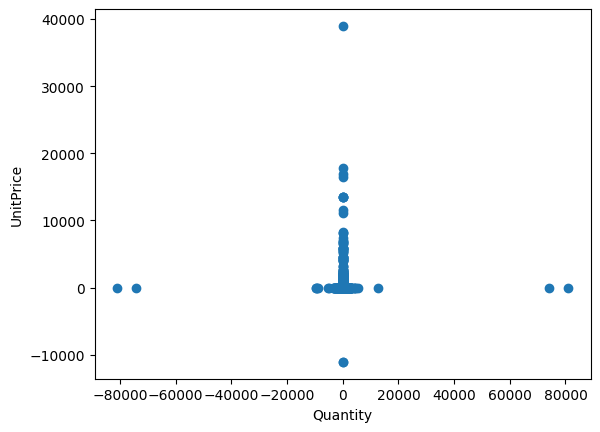

In [ ]:
# Create a scatter plot to analyze the relationship between two numerical columns in a dataset.

plt.scatter(df['Quantity'], df['UnitPrice'])
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

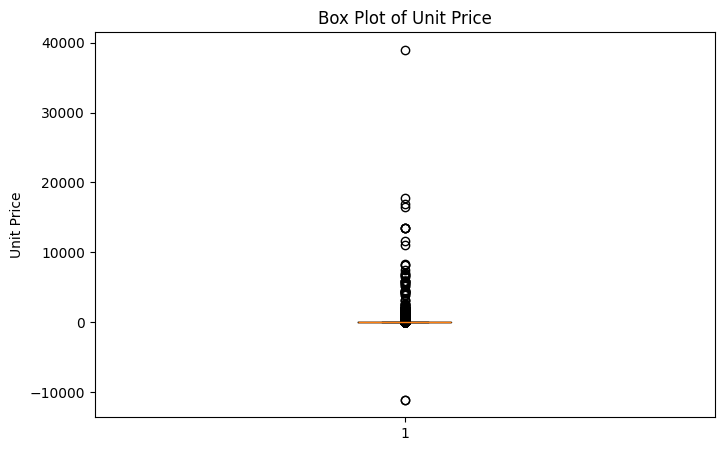

Total number of outliers in 'UnitPrice': 39627
    InvoiceNo  UnitPrice
16     536367       9.95
45     536370      18.00
65     536374      10.95
141   C536379      27.50
151    536382      14.95


In [ ]:
# Use box plots to identify outliers in a dataset.
unit_price = df['UnitPrice'].dropna()
plt.figure(figsize=(8, 5))
plt.boxplot(unit_price)
plt.title('Box Plot of Unit Price')
plt.ylabel('Unit Price')
plt.show()
# Outlier Detection using IQR
Q1 = unit_price.quantile(0.25)
Q3 = unit_price.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = df[(df['UnitPrice'] < lower_bound) | (df['UnitPrice'] > upper_bound)]
# Print result
print("Total number of outliers in 'UnitPrice':", len(outliers))
print(outliers[['InvoiceNo', 'UnitPrice']].head())

# 4.Logistic Regression Model:
• Load a dataset and split it into training and testing sets.

• Implement Logistic Regression using sklearn and evaluate it using accuracy,
precision, recall, and F1-score.

• Plot the ROC-AUC curve for the model.


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,36,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,36,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,36,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,36,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,36,20.34


In [ ]:
# Implement Logistic Regression using sklearn.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
df=df.dropna()

In [ ]:
X=df[['Quantity','UnitPrice']]
y=df['Country']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
# Evaluate it using accuracy, precision, recall, and F1-score.
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy*100:.2f}%')
print(f'Precision:{precision_score(y_test,y_pred,average="weighted",zero_division=0)*100:.2f}%')
print(f'Recall:{recall_score(y_test,y_pred,average="weighted",zero_division=0)*100:.2f}%')
print(f'F1-score:{f1_score(y_test,y_pred,average="weighted",zero_division=0)*100:.2f}%')

Accuracy:88.97%
Precision:79.20%
Recall:88.97%
F1-score:83.80%


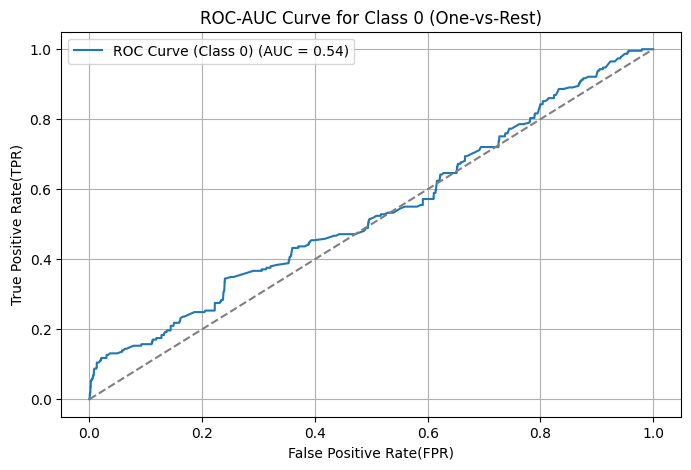

In [ ]:
# Import ROC AUC from sklearn
from sklearn.metrics import roc_curve, roc_auc_score
# Gets the predicted class probabilities for each test sample.
y_probs = model.predict_proba(X_test)
# Sets which class you want to plot the ROC curve for
class_id_to_plot = 0
# Converts the multi-class target (y_test) into a binary target:
y_test_binary = (y_test == class_id_to_plot).astype(int)
# Extracts the predicted probability only for the selected class
y_probs_class = y_probs[:, class_id_to_plot]
fpr, tpr, _ = roc_curve(y_test_binary, y_probs_class)
auc_score = roc_auc_score(y_test_binary, y_probs_class)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (Class {class_id_to_plot}) (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title(f'ROC-AUC Curve for Class {class_id_to_plot} (One-vs-Rest)')
plt.legend()
plt.grid(True)
plt.show()

# 5.Linear Regression Model:
• Train a Linear Regression model on a dataset where the target variable is
continuous.

• Calculate Mean Squared Error (MSE) and R-squared score.

In [ ]:
# Train a Linear Regression model on a dataset where the target variable is continuous.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
target_column='Quantity'
x=df.drop(columns=[target_column],axis=1)
Y=df[target_column]

In [ ]:
x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.2,random_state=42)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
print("Mean Squared Error:",mean_squared_error(Y_test,Y_pred))
print("R-squared Score:",r2_score(Y_test,Y_pred))

Mean Squared Error: 7.17768938422413e-26
R-squared Score: 1.0
